In [1]:
import gzip
from Bio import SeqIO, SeqRecord
from Bio.SeqUtils import CodonAdaptationIndex
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import entropy
import numpy as np
import re
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime
import random
from collections import Counter

human_proteome_path = "../../datasets/raw/Homo_sapiens.GRCh38.cds.all.fa.gz"
# base_path = "../../datasets/raw/spikenuc0415_clean_n_X.fasta"
# base_path = "../../datasets/raw/spike_nuc_clean_3813"
base_path = "../../datasets/test.fasta"
de_novo_path = "../../sample_outputs/final_full/rnaformerS_large__generated__de_novo.fasta"
de_novo_new_path = "../../sample_outputs/2023_11_20__13_56_18/rnaformerS_large__generated__de_novo.fasta"
# de_novo_human_path = "../../sample_outputs/final_full/rnaformerS_large_human_cai__generated__de_novo.fasta"
# de_novo_covid_path = "../../sample_outputs/final_full/rnaformerS_large_covid_cai__generated__de_novo.fasta"

covid_3813_path = "../../datasets/test.fasta"
paths = []

pattern = re.compile("[^AatTgGcC*?]")

for i in range(0, 15):
    path = base_path.replace("X", str(i+1))
    paths.append(path)

def is_gene_valid(seq):
    if len(seq) % 3 != 0:
        return False
    if re.search(pattern, str(seq)):
        return False
    
    return True

CODON_INDICES = {
    "AAA": 0,
    "AAC": 1,
    "AAG": 2,
    "AAT": 3,

    "ACA": 4,
    "ACC": 5,
    "ACG": 6,
    "ACT": 7,
 
    "AGA": 8,
    "AGC": 9,
    "AGG": 10,
    "AGT": 11,
 
    "ATA": 12,
    "ATC": 13,
    "ATG": 14,
    "ATT": 15,
 
    "CAA": 16,
    "CAC": 17,
    "CAG": 18,
    "CAT": 19,

    "CCA": 20,
    "CCC": 21,
    "CCG": 22,
    "CCT": 23,
 
    "CGA": 24,
    "CGC": 25,
    "CGG": 26,
    "CGT": 27,
 
    "CTA": 28,
    "CTC": 29,
    "CTG": 30,
    "CTT": 31,

    "GAA": 32,
    "GAC": 33,
    "GAG": 34,
    "GAT": 35,

    "GCA": 36,
    "GCC": 37,
    "GCG": 38,
    "GCT": 39,
 
    "GGA": 40,
    "GGC": 41,
    "GGG": 42,
    "GGT": 43,
 
    "GTA": 44,
    "GTC": 45,
    "GTG": 46,
    "GTT": 47,

    "TAA": 48,
    "TAC": 49,
    "TAG": 50,
    "TAT": 51,

    "TCA": 52,
    "TCC": 53,
    "TCG": 54,
    "TCT": 55,
 
    "TGA": 56,
    "TGC": 57,
    "TGG": 58,
    "TGT": 59,
 
    "TTA": 60,
    "TTC": 61,
    "TTG": 62,
    "TTT": 63,
}

In [2]:
# Calculate all the biases
natural_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
natural_biases = []
for seq_record in tqdm(natural_seqs_file):
    if is_gene_valid(seq_record.seq):
        natural_biases.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
# covid_biases = []
# for seq_record in tqdm(covid_seqs_file):
#     if is_gene_valid(seq_record.seq):
#         covid_biases.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

dummy_seqs_file = SeqIO.parse(de_novo_path, "fasta")
dummy_biases = []
for seq_record in tqdm(dummy_seqs_file):
    if is_gene_valid(seq_record.seq):
        dummy_biases.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

dummy_new_seqs_file = SeqIO.parse(de_novo_new_path, "fasta")
dummy_new_biases = []
for seq_record in tqdm(dummy_new_seqs_file):
    if is_gene_valid(seq_record.seq):
        dummy_new_biases.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
# human_biases = []
# for seq_record in tqdm(human_seqs_file):
#     if is_gene_valid(seq_record.seq):
#         human_biases.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
human_valid_proteome = []
for seq_record in tqdm(human_proteome):
    if is_gene_valid(seq_record.seq):
        human_valid_proteome.append(seq_record)
        # cai.cai_for_gene(str(seq_record.seq))

human_bias = CodonAdaptationIndex(human_valid_proteome)

33198it [00:47, 696.66it/s]
13953it [00:20, 669.31it/s]

/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'PCA analysis of CAI')]

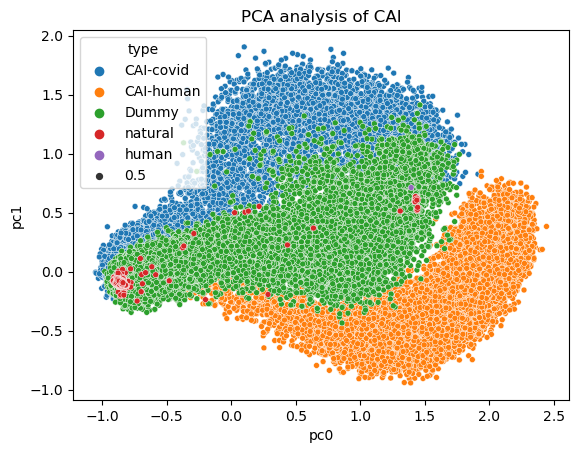

In [33]:
def days(d):
    return d.days

natural_biases_pd = pd.DataFrame(natural_biases)
# covid_biases_pd = pd.DataFrame(covid_biases)
dummy_biases_pd = pd.DataFrame(dummy_biases)
dummy_new_biases_pd = pd.DataFrame(dummy_new_biases)
# human_biases_pd = pd.DataFrame(human_biases)
human_bias_pd = pd.DataFrame([human_bias])

pca = PCA(n_components=2)

# pca.fit(pd.concat([natural_biases_pd, covid_biases_pd, human_biases_pd, dummy_biases_pd]))
pca.fit(pd.concat([natural_biases_pd, dummy_new_biases_pd, dummy_biases_pd]))
# pca.fit(natural_biases_pd)

natural_biases_pd = pca.transform(natural_biases_pd)
# covid_biases_pd = pca.transform(covid_biases_pd)
dummy_biases_pd = pca.transform(dummy_biases_pd)
dummy_new_biases_pd = pca.transform(dummy_new_biases_pd)
# human_biases_pd = pca.transform(human_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

natural_biases_pd = pd.DataFrame(natural_biases_pd, columns=["pc0", "pc1"])
natural_biases_pd["type"] = "natural"

human_bias_pd = pd.DataFrame(human_bias_pd, columns=["pc0", "pc1"])
human_bias_pd["type"] = "human"

# covid_biases_pd = pd.DataFrame(covid_biases_pd, columns=["pc0", "pc1"])
# covid_biases_pd["type"] = "CAI-covid"

# human_biases_pd = pd.DataFrame(human_biases_pd, columns=["pc0", "pc1"])
# human_biases_pd["type"] = "CAI-human"

dummy_biases_pd = pd.DataFrame(dummy_biases_pd, columns=["pc0", "pc1"])
dummy_biases_pd["type"] = "Dummy"

dummy_new_biases_pd = pd.DataFrame(dummy_new_biases_pd, columns=["pc0", "pc1"])
dummy_new_biases_pd["type"] = "Dummy (new)"

# all_biases_pd = pd.concat([covid_biases_pd, human_biases_pd, dummy_biases_pd, natural_biases_pd, human_bias_pd], ignore_index=True)
all_biases_pd = pd.concat([dummy_new_biases_pd, dummy_biases_pd, natural_biases_pd, human_bias_pd], ignore_index=True)

sns.scatterplot(all_biases_pd["pc0"], all_biases_pd["pc1"], hue=all_biases_pd["type"], size=0.5).set(title='PCA analysis of CAI')

/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'KDE plot of PCA decomposition of CAI values')

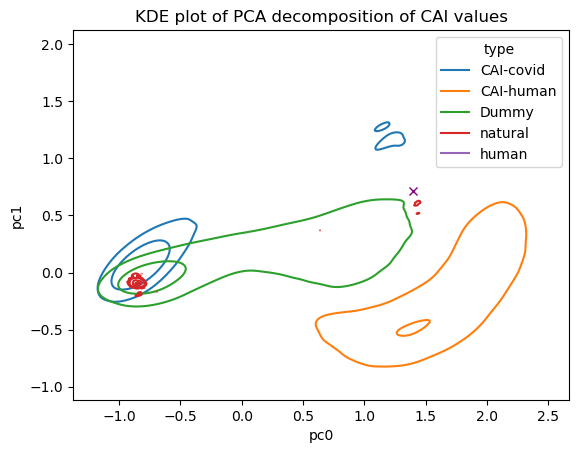

In [34]:
ax = sns.kdeplot(
    data=all_biases_pd, x="pc0", y="pc1", hue="type", levels=5
)

plt.plot(human_bias_pd["pc0"], human_bias_pd["pc1"], color='purple', marker='x', ms=6)
plt.title("KDE plot of PCA decomposition of CAI values")